# Exploratory Data Analysis

### Import required libraries

In [1]:
# Required libraries for data analysis and visualisation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set color theme
sns.set(color_codes=True, style='darkgrid')

# Run the following cell if you wish to suppress panda's FutureWarning warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

### Load data into data frame

In [2]:
# Reads (by default) all 'NA' strings as NaN values
df = pd.read_excel('mpg.data.xlsx')

# Display top 5 rows
print(df.head())

    mpg  cylinders  displayments  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  Unnamed: 9  Unnamed: 10  \
0          70       1  chevrolet chevelle malibu         NaN          NaN   
1          70       1          buick skylark 320         NaN          NaN   
2          70       1         plymouth satellite         NaN          NaN   
3          70       1              amc rebel sst         NaN          NaN   
4          70       1                ford torino         NaN          NaN   

   Unnamed: 11 Unnamed: 12  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  


### Inspect data

In [3]:
# Inspect the dimensions of the data frame/table.
print(f'This dataset has : {df.shape[0]} observations.')

print(f'This dataset has: {df.shape[1]} attributes.\n')

# Inspect data type of each column
print('Attributes\t Type\n')

print(df.dtypes)

This dataset has : 406 observations.
This dataset has: 13 attributes.

Attributes	 Type

mpg             float64
cylinders         int64
displayments    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
Unnamed: 9      float64
Unnamed: 10     float64
Unnamed: 11     float64
Unnamed: 12      object
dtype: object


### Descriptive statistics of data frame

In [4]:
print(df.describe())

              mpg   cylinders  displayments  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  Unnamed: 9  Unnamed: 10  \
count    406.000000  406.000000  406.000000         0.0          0.0   
mean      15.519704   75.921182    1.568966         NaN          NaN   
std        2.803359    3.748737    0.797479         NaN          NaN   
min        8.000000   70.000000    1.000000         NaN        

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   1 non-null      object 
dtypes: float64(7), int64(4), object(2)
memory usage: 41.4+ KB
None


### Remove "Unnamed" column(s)

In [6]:
# Unnamed columns have no information. They are not actual features of the dataset so they should be removed.
df = df.drop(columns=[col for col in df if col.startswith('Unnamed:')])

print(f'This dataset now has: {df.shape[1]} attributes.\n')

This dataset now has: 9 attributes.



### Detecting outliers

<AxesSubplot:xlabel='acceleration'>

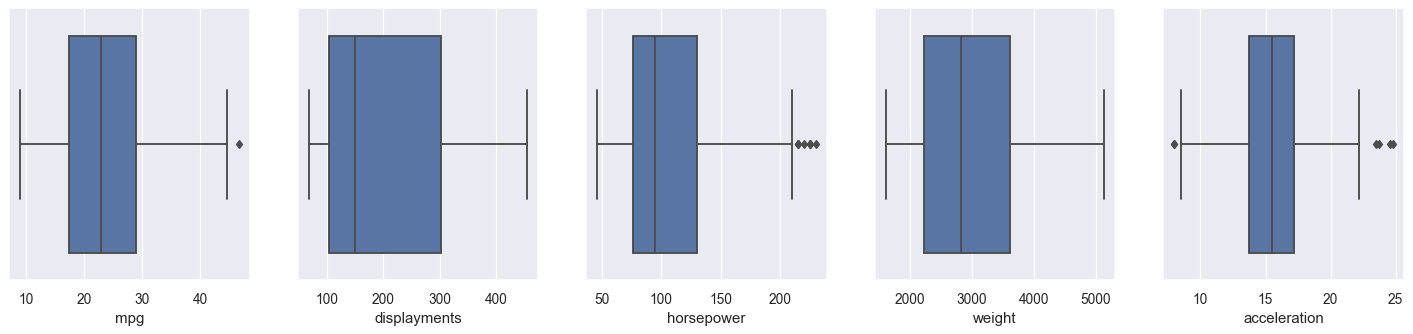

In [7]:
# Visualising with boxplots to check if there are outliers
fig, axes = plt.subplots(figsize=(20,4), nrows=1, ncols=5, dpi=90)
sns.boxplot(x=df['mpg'], ax=axes[0])
sns.boxplot(x=df['displayments'], ax=axes[1])
sns.boxplot(x=df['horsepower'], ax=axes[2])
sns.boxplot(x=df['weight'], ax=axes[3])
sns.boxplot(x=df['acceleration'], ax=axes[4])

### Detecting NaN values

In [8]:
print('Features\tNumber of NA values')
print(df.isna().sum())

Features	Number of NA values
mpg             8
cylinders       0
displayments    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


### Distribution of continuous attributes

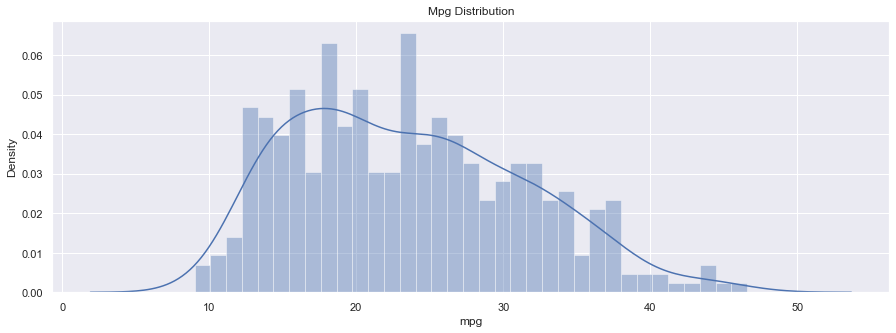

In [14]:
plt.figure(figsize=(15, 5))
sns.distplot(df['mpg'], hist=True, bins=35)
plt.title('Mpg Distribution');

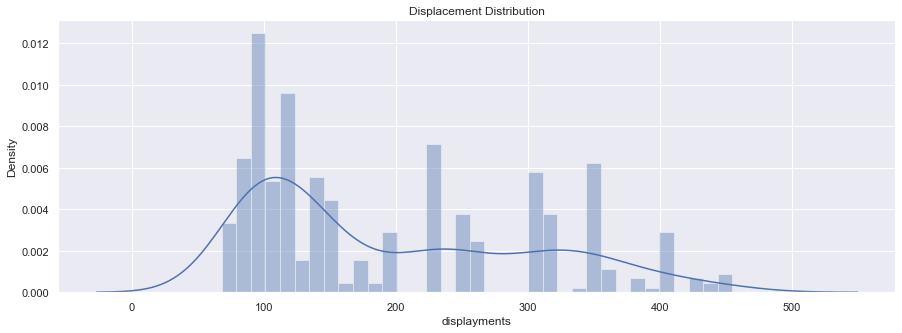

In [15]:
plt.figure(figsize=(15, 5))
sns.distplot(df['displayments'], hist=True, bins=35)
plt.title('Displacement Distribution');

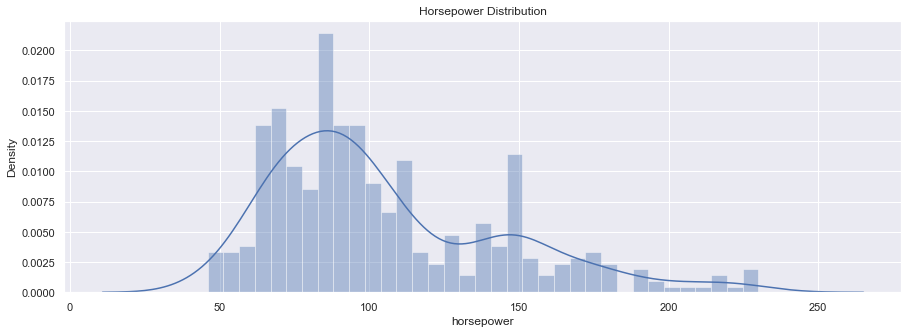

In [16]:
plt.figure(figsize=(15, 5))
sns.distplot(df['horsepower'], hist=True, bins=35)
plt.title('Horsepower Distribution');

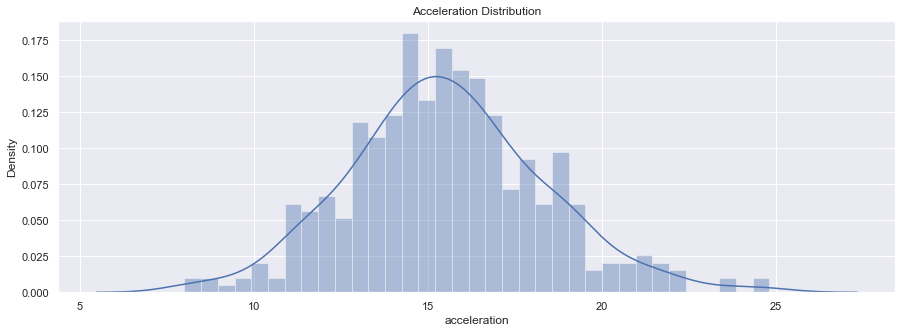

In [17]:
plt.figure(figsize=(15, 5))
sns.distplot(df['acceleration'], hist=True, bins=35)
plt.title('Acceleration Distribution');

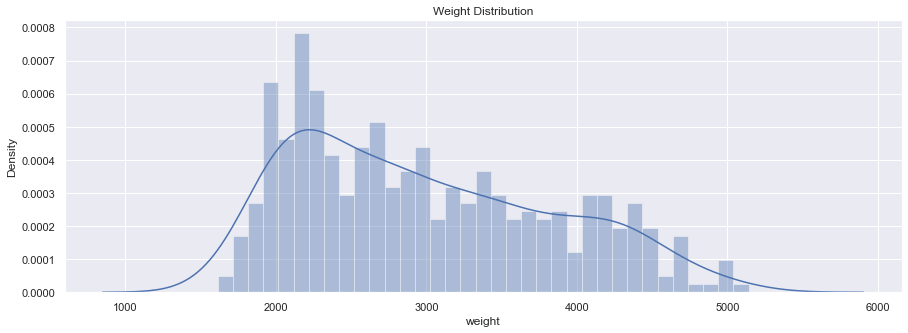

In [18]:
plt.figure(figsize=(15, 5))
sns.distplot(df['weight'], hist=True, bins=35)
plt.title('Weight Distribution');

### Heat map

                   mpg  cylinders  displayments  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.951787    0.844158  0.895220   
displayments -0.804203   0.951787      1.000000    0.898326  0.932475   
horsepower   -0.778427   0.844158      0.898326    1.000000  0.866586   
weight       -0.831741   0.895220      0.932475    0.866586  1.000000   
acceleration  0.420289  -0.522452     -0.557984   -0.697124 -0.430086   
model year    0.579267  -0.360762     -0.381714   -0.424419 -0.315389   
origin        0.563450  -0.567478     -0.613056   -0.460033 -0.584109   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.522452   -0.360762 -0.567478  
displayments     -0.557984   -0.381714 -0.613056  
horsepower       -0.697124   -0.424419 -0.460033  
weight           -0.430086   -0.315389 -0.584109  
acceleration      1.000000    0.3019

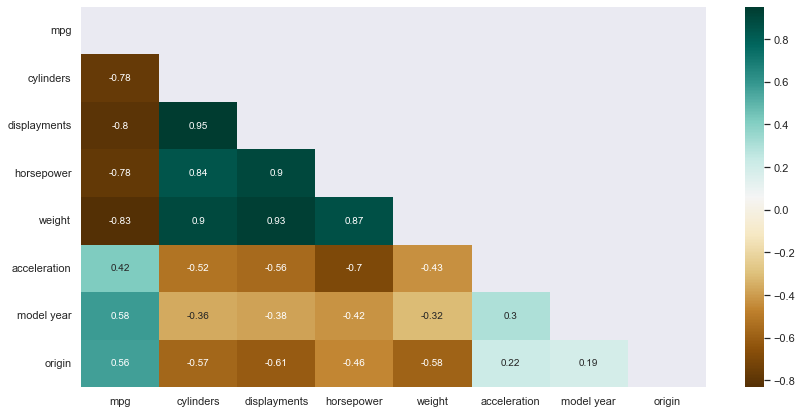

In [14]:
# Heatmap plot to check corellation between variables
plt.figure(figsize=(14, 7))
c = df.corr(method='pearson', min_periods=1)
matrix = np.triu(c)
sns.heatmap(c, cmap='BrBG', annot=True, mask=matrix)
print(c)

### Plot different features against one another

<Figure size 1008x504 with 0 Axes>

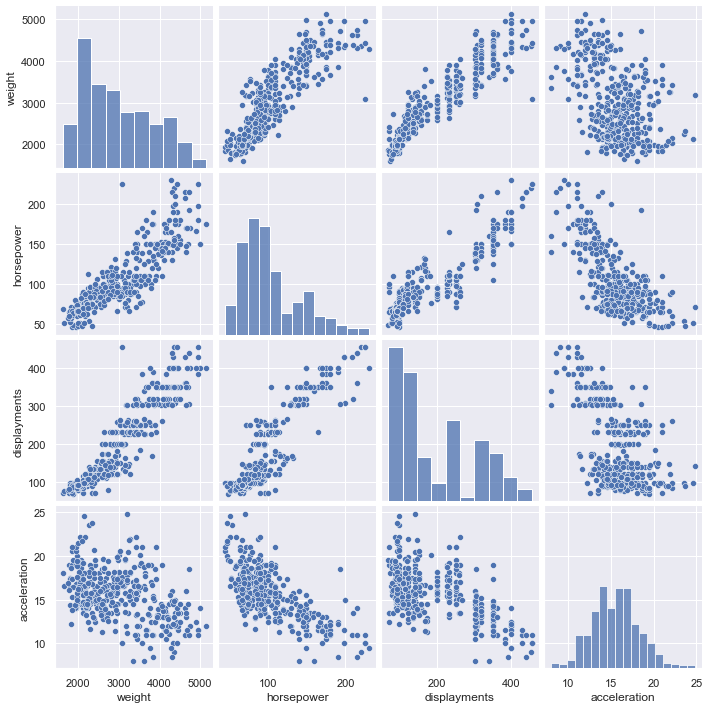

In [22]:
plt.figure(figsize=(14, 7))
sns.pairplot(df[['weight', 'horsepower', 'displayments', 'acceleration']]);

### Mpg Analysis

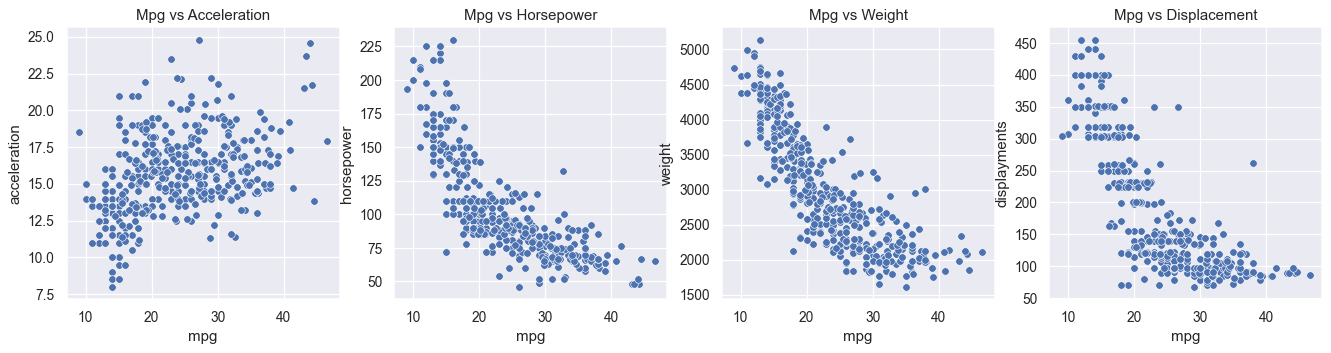

In [23]:
# Visualize the corellation between our target value('mpg') and other continuous variables.
fig, axes = plt.subplots(figsize=(18, 4), nrows=1, ncols=4, dpi=90)

sns.scatterplot(x='mpg', y='acceleration', data=df, ax=axes[0])
axes[0].set_title('Mpg vs Acceleration')

sns.scatterplot(x='mpg', y='horsepower', data=df, ax=axes[1])
axes[1].set_title('Mpg vs Horsepower')

sns.scatterplot(x='mpg', y='weight', data=df, ax=axes[2])
axes[2].set_title('Mpg vs Weight')

sns.scatterplot(x='mpg', y='displayments', data=df, ax=axes[3])
axes[3].set_title('Mpg vs Displacement');

### Number of cars by year

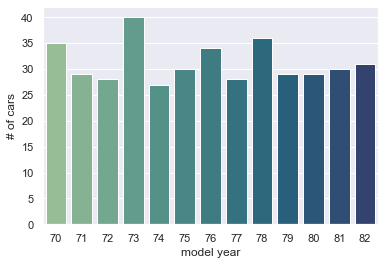

In [24]:
sns.countplot(x='model year', data=df, palette='crest')
plt.ylabel('# of cars');

### Nymber of cars and average mpg by origin

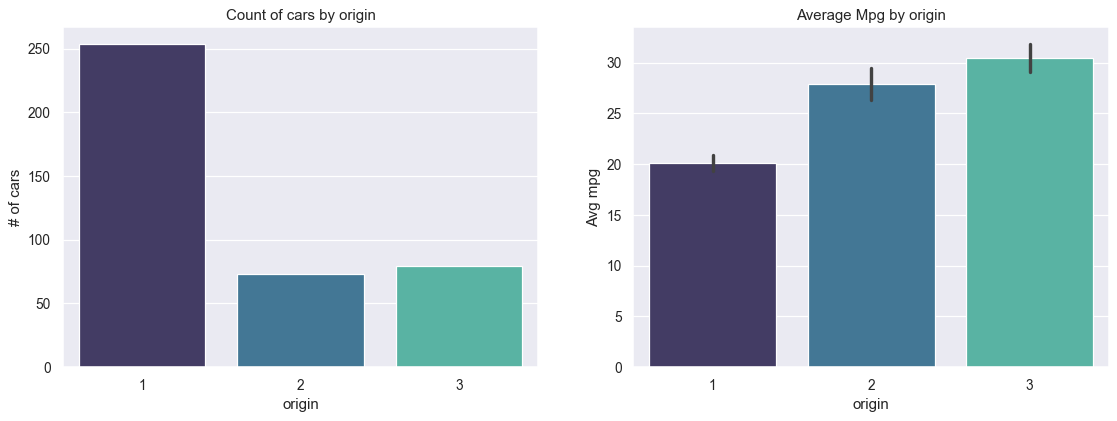

In [25]:
fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=2, dpi=90)

sns.countplot(x='origin', data=df, ax=axes[0], palette='mako')
axes[0].set_title('Count of cars by origin')
axes[0].set_ylabel('# of cars')

sns.barplot(x='origin', y='mpg', data=df, ax=axes[1], palette='mako')
axes[1].set_title('Average Mpg by origin')
axes[1].set_ylabel('Avg mpg');

### Number of cars by cylinders

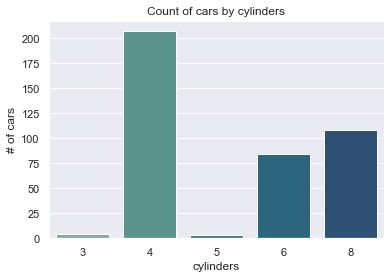

In [26]:
sns.countplot(x='cylinders', data=df, palette='crest')
plt.title('Count of cars by cylinders')
plt.ylabel('# of cars');